**Name**

* **Yu-Chih (Wisdom) Chen**
* **Devon Delgado**
* **Xiaobing Xu**
* **Peter Ye**

**Date**

**11/16/2024**

# Fake Job Description Prediction Dataset

## Overview
This dataset is designed for developing classification models to identify fraudulent job postings. It contains approximately 18,000 job descriptions, with around 800 labeled as fake.

## Dataset Details
- **Total Entries**: ~18,000 job descriptions
- **Fraudulent Entries**: ~800
- **Data Types**: Textual information and meta-information about jobs

## Source
The University of the Aegean | Laboratory of Information & Communication Systems Security
(http://emscad.samos.aegean.gr/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

from utli import *

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/yzysnake/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/yzysnake/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/yzysnake/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## 1. Load Data

In [2]:
df = pd.read_csv('fake_job_postings.csv') # Change it to data source

In [3]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## 2. Exploratory Data Analysis (EDA)

In [4]:
# Get the dimensions of the Dataset
print("Dimensions of the Dataset (Rows, Columns):")
df.shape

Dimensions of the Dataset (Rows, Columns):


(17880, 18)

In [5]:
# Removing any leading, and trailing whitespaces in columns
df.columns = df.columns.str.strip()

In [6]:
# Check if any duplicate rows in dataset
df.duplicated().sum()

0

In [7]:
# Getting an overview of the features and their types in the dataset
print("Overview of the features and their types:")
df.info()

Overview of the features and their types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry   

In [8]:
# Count the number of columns with dtype 'object'
object_cols = df.select_dtypes(include=['object']).columns
num_object_cols = len(object_cols)

# Count the number of columns with dtype 'int64'
int_cols = df.select_dtypes(include=['int64']).columns
num_int_cols = len(int_cols)

print(f"Number of columns with object dtype: {num_object_cols}")
print(f"Number of columns with int64 dtype: {num_int_cols}")

Number of columns with object dtype: 13
Number of columns with int64 dtype: 5


### a. Missing Values

In [9]:
print("Display Missing values in the dataset: ")
print("\n")

print(df.isnull().sum())

Display Missing values in the dataset: 


job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64


In [10]:
# View percentage of missing values per column
print('Percent of Null Values in Each Column:\n')
print(df.isnull().sum()/df.shape[0]*100)

Percent of Null Values in Each Column:

job_id                  0.000000
title                   0.000000
location                1.935123
department             64.580537
salary_range           83.959732
company_profile        18.501119
description             0.005593
requirements           15.078300
benefits               40.335570
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.412752
required_experience    39.429530
required_education     45.329978
industry               27.421700
function               36.101790
fraudulent              0.000000
dtype: float64


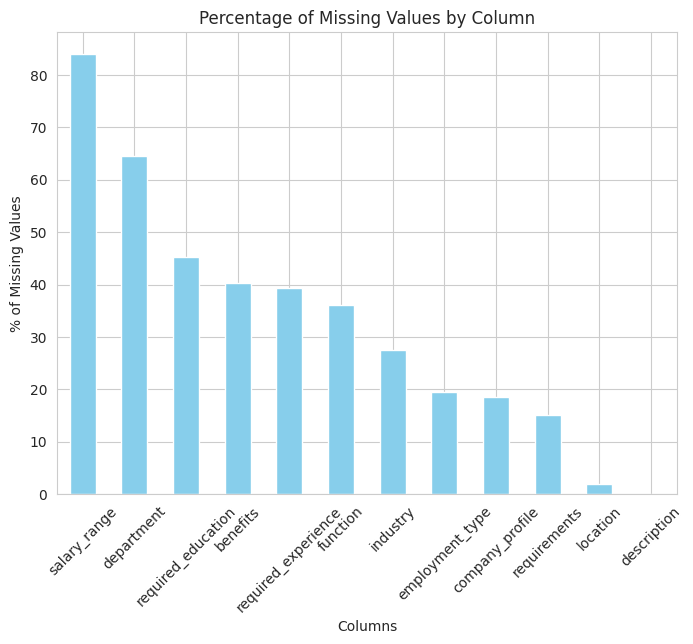

In [11]:
# Count and display percentage of missing values
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

plt.figure(figsize=(8, 6))
missing_percent.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values by Column')
plt.ylabel('% of Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()

### b. Visualizatioin

In [12]:
#Differentiate categorical data and numerical data
df_num = df[['telecommuting','has_company_logo','has_questions','fraudulent','salary_range']]
df_cat = df[['title', 'location','company_profile', 'requirements','employment_type',
       'required_experience', 'required_education', 'industry', 'function']]

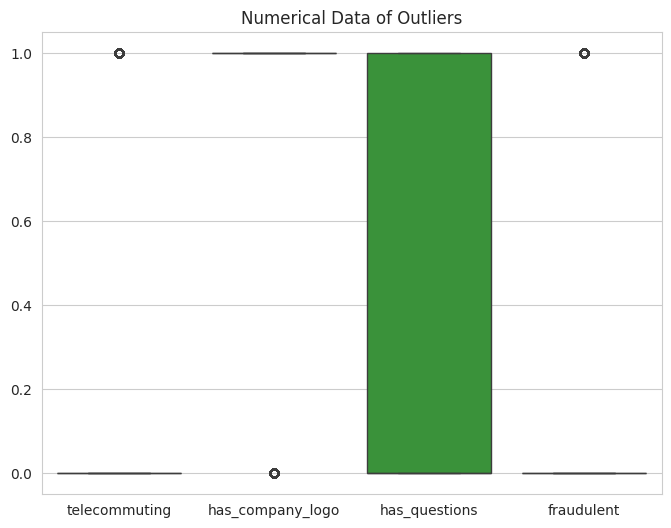

In [13]:
# Checking for Outliers in numerical data
plt.figure(figsize=[8,6])
sns.boxplot(data = df_num)
plt.title("Numerical Data of Outliers")
plt.show()

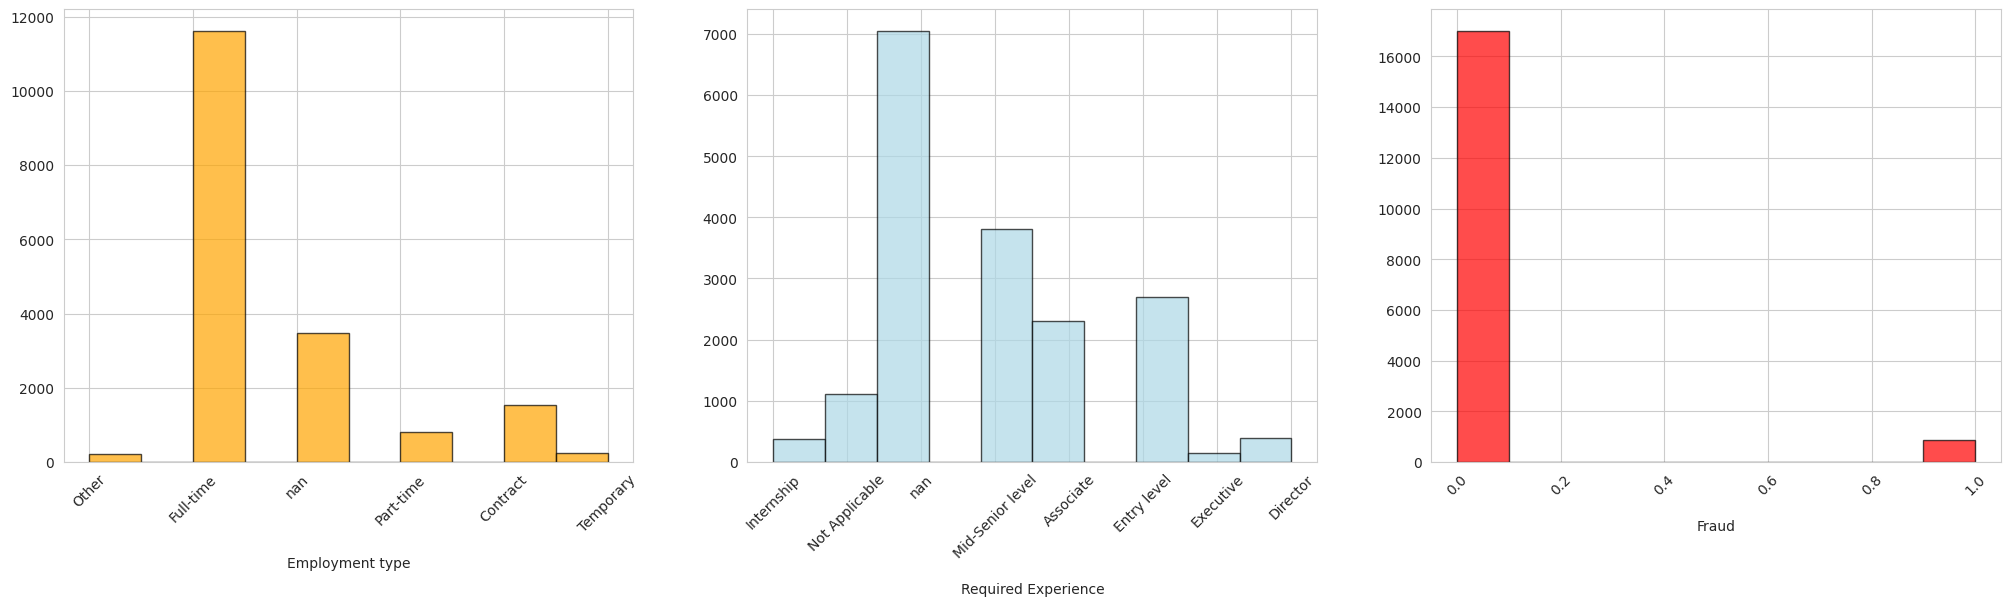

In [14]:
# Plots to see the distribution of the continuous features individually
plt.figure(figsize= (25,20))
plt.subplot(3,3,1)
# Convert 'employment_type' to string type before plotting
plt.hist(df.employment_type.astype(str), color='orange', edgecolor = 'black', alpha = 0.7)
plt.xlabel('\nEmployment type')
plt.xticks(rotation=45)

plt.subplot(3,3,2)
# Convert 'required_experience' to string type before plotting
plt.hist(df.required_experience.astype(str), color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('\nRequired Experience')
plt.xticks(rotation=45)

plt.subplot(3,3,3)
plt.hist(df.fraudulent, color='red', edgecolor = 'black', alpha = 0.7)
plt.xlabel('\nFraud')
plt.xticks(rotation=45)


plt.show()

<Axes: title={'center': 'Number of Job Function'}, xlabel='function', ylabel='count'>

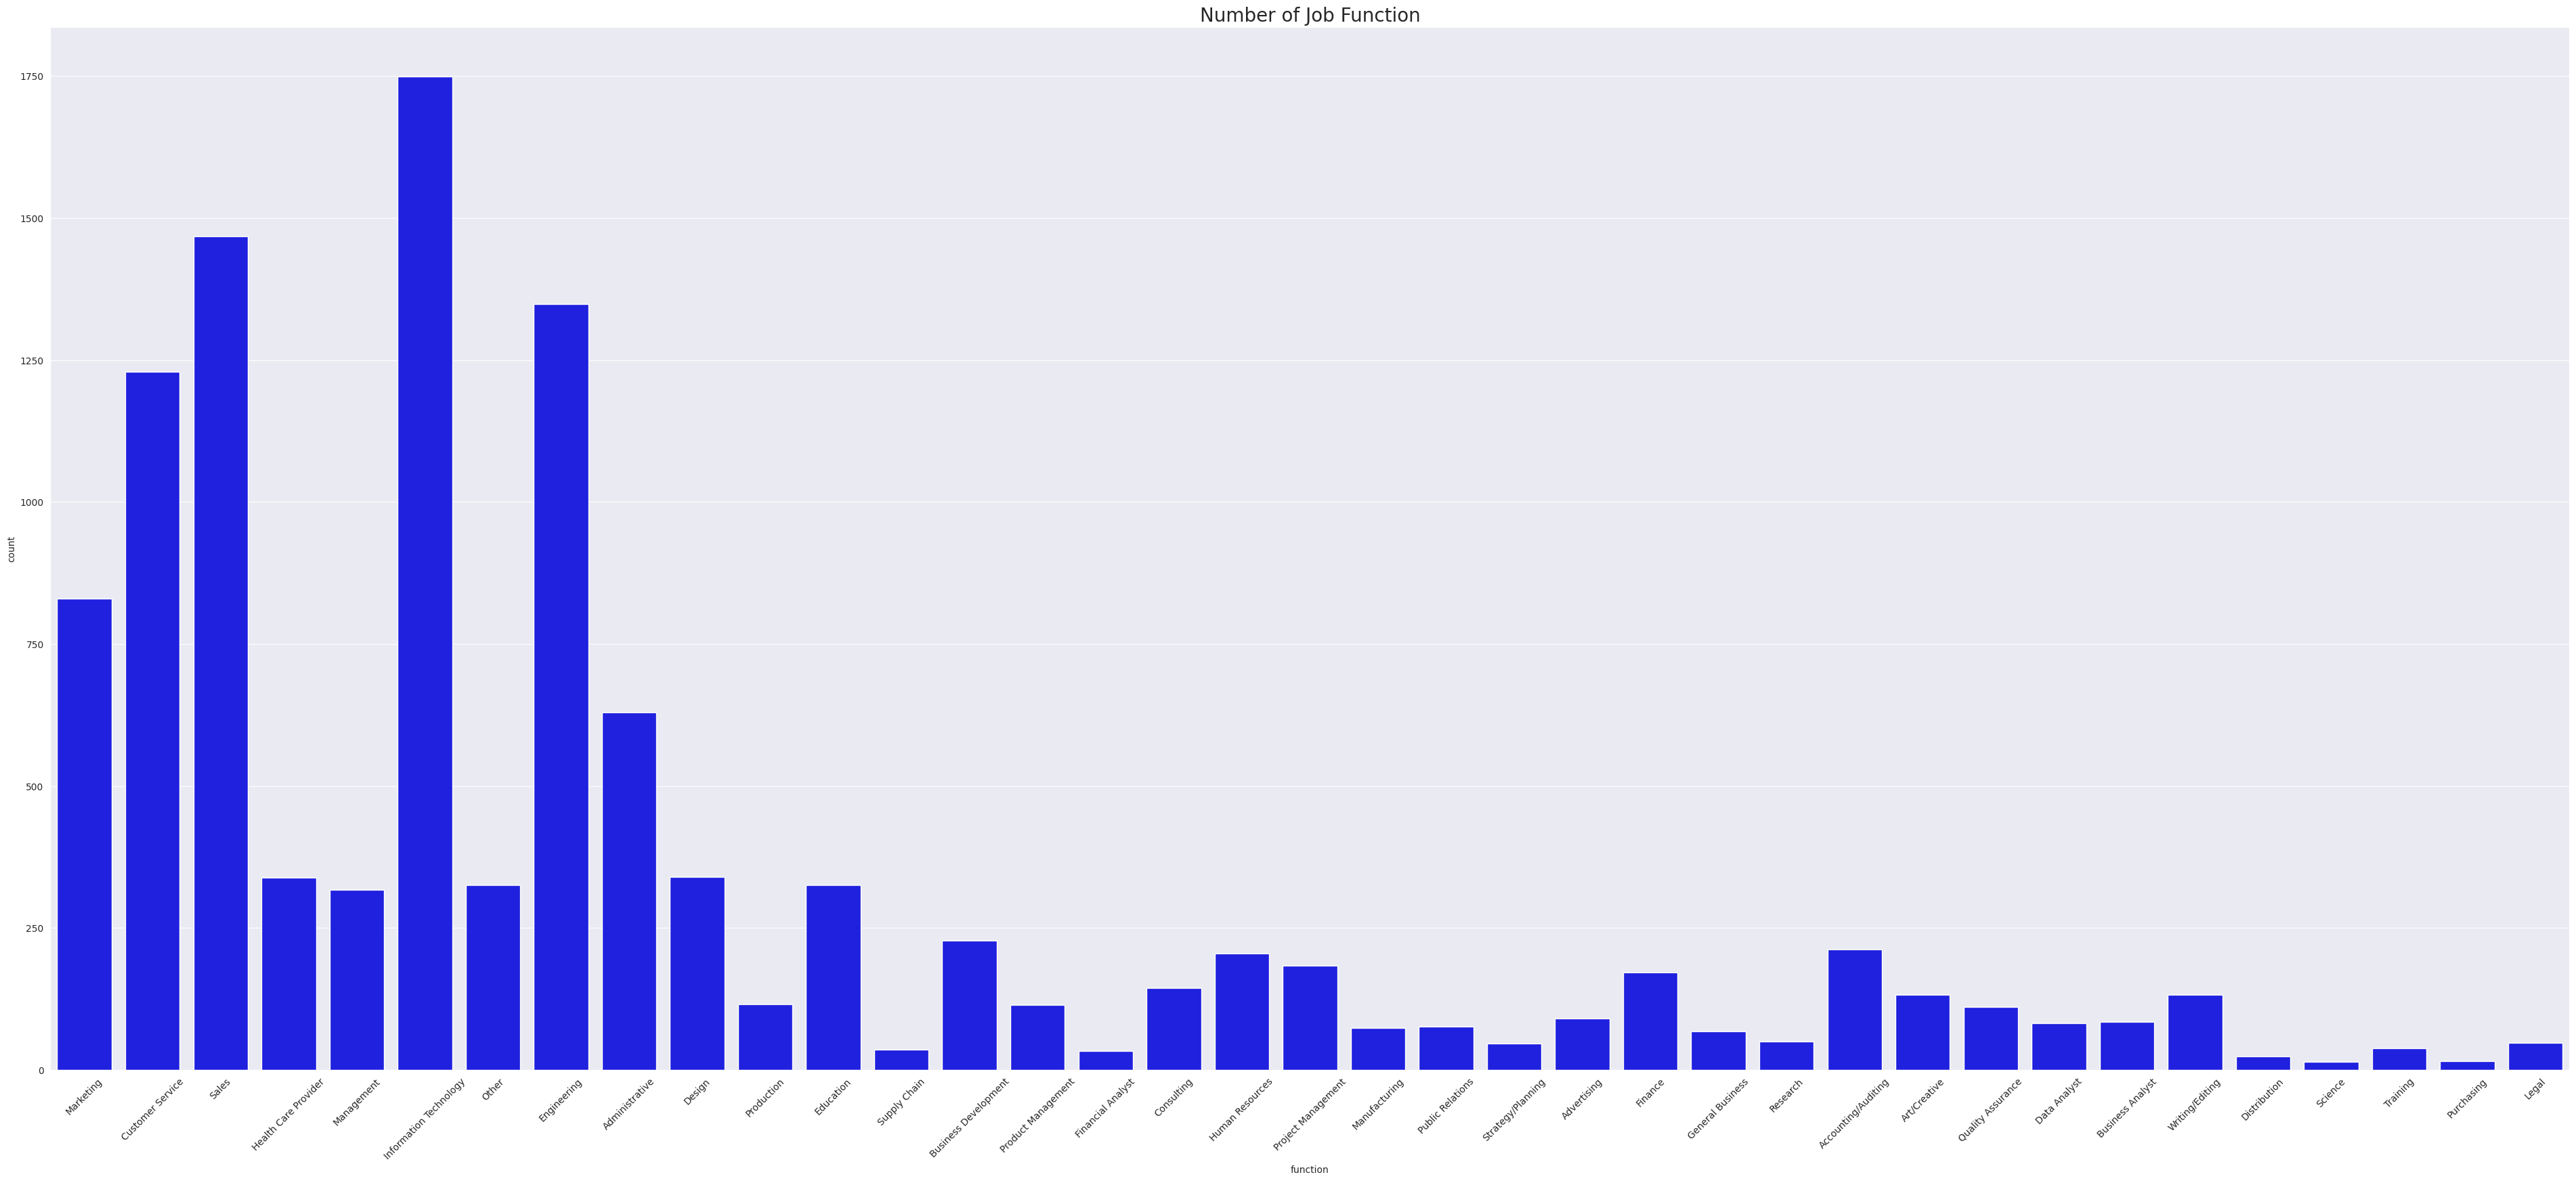

In [16]:
# Number of Job Function
plt.figure(figsize=(48, 20))
plt.xticks(rotation=45)
plt.title("Number of Job Function", fontsize=20)
sns.set_style("darkgrid")
sns.countplot(x='function', data=df, color='blue')  # Adjust color if needed

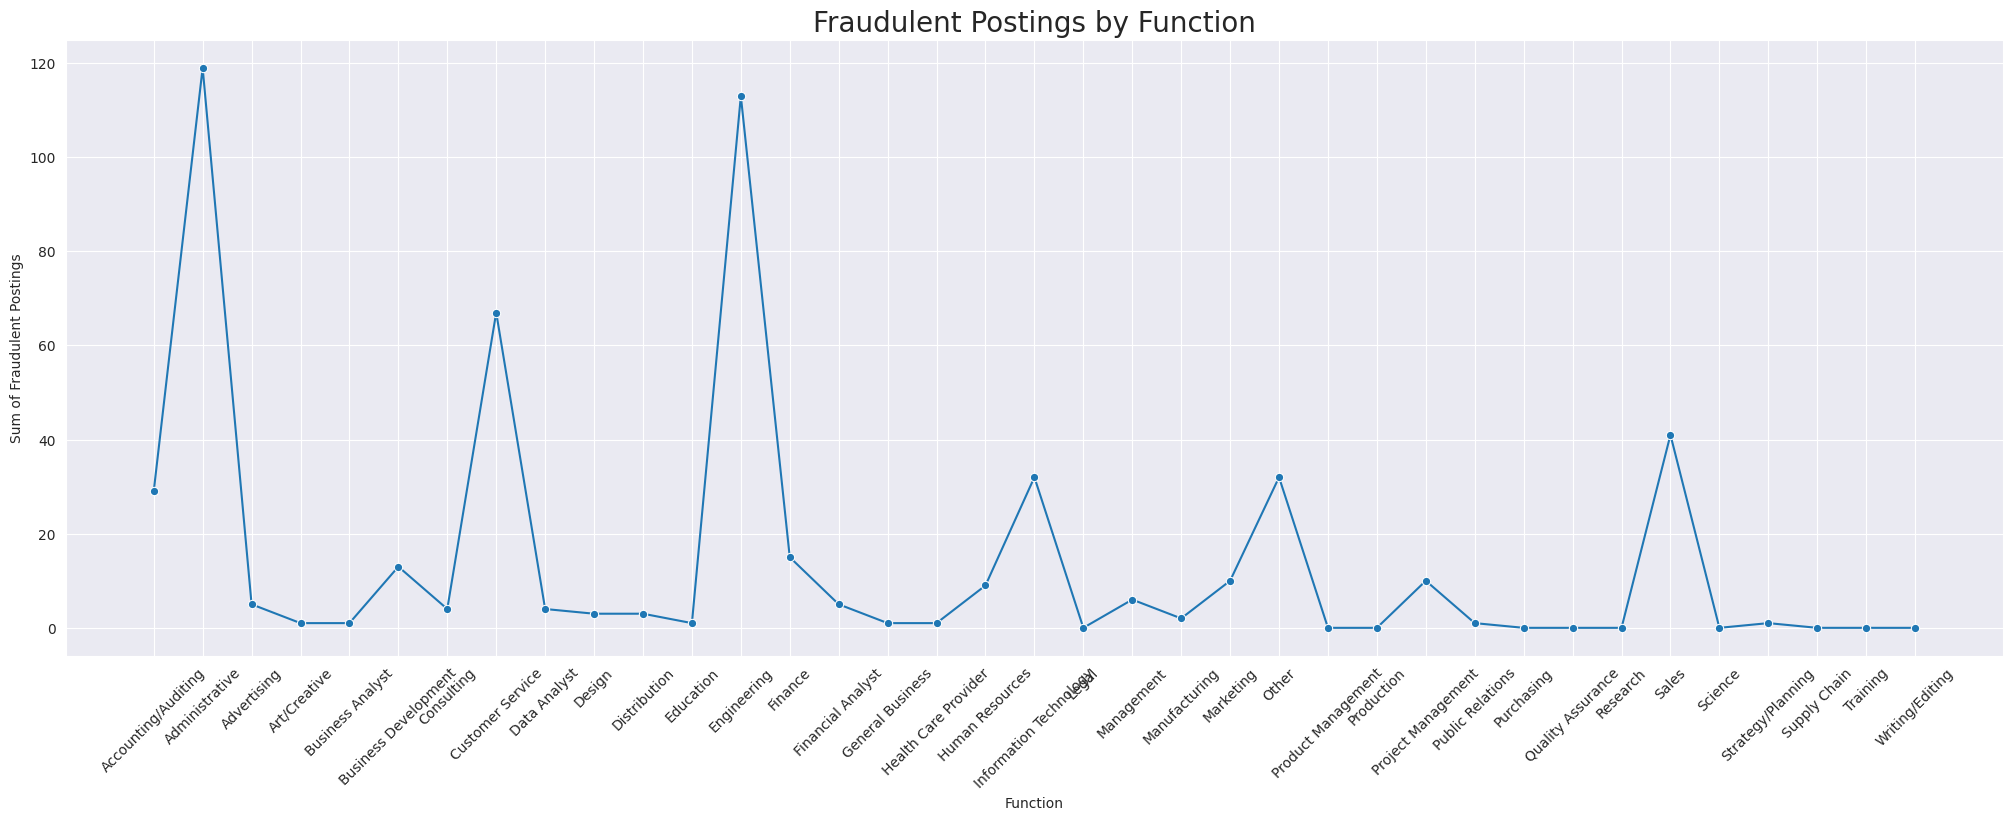

In [17]:
# Calculate the sum of fraudulent postings by function
fraudulent_summary = df.groupby('function')['fraudulent'].sum().reset_index()

plt.figure(figsize=(25, 8))
sns.lineplot(data=fraudulent_summary, x='function', y='fraudulent', marker='o')
plt.title('Fraudulent Postings by Function', fontsize = 20)
plt.xlabel('Function')
plt.ylabel('Sum of Fraudulent Postings')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

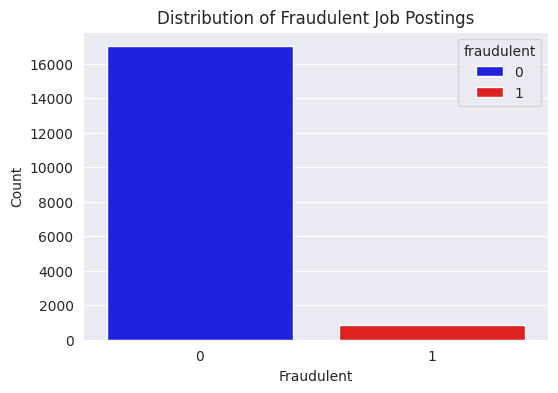

In [23]:
# Bar plot for fraudulent (target) feature
fraud_colors = ['blue', 'red']
plt.figure(figsize=(6, 4))
sns.countplot(x='fraudulent', data=df, hue='fraudulent', palette=fraud_colors, dodge=False)
plt.title('Distribution of Fraudulent Job Postings')
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.show()

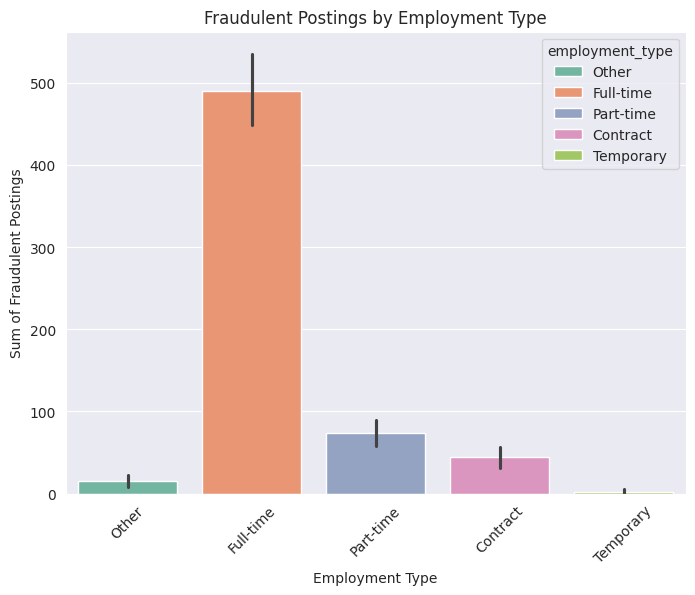

In [24]:
# Bar plot for employment_type
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='employment_type', y='fraudulent', estimator=sum, hue='employment_type', dodge=False, palette='Set2')
plt.title('Fraudulent Postings by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Sum of Fraudulent Postings')
plt.xticks(rotation=45)
plt.show()

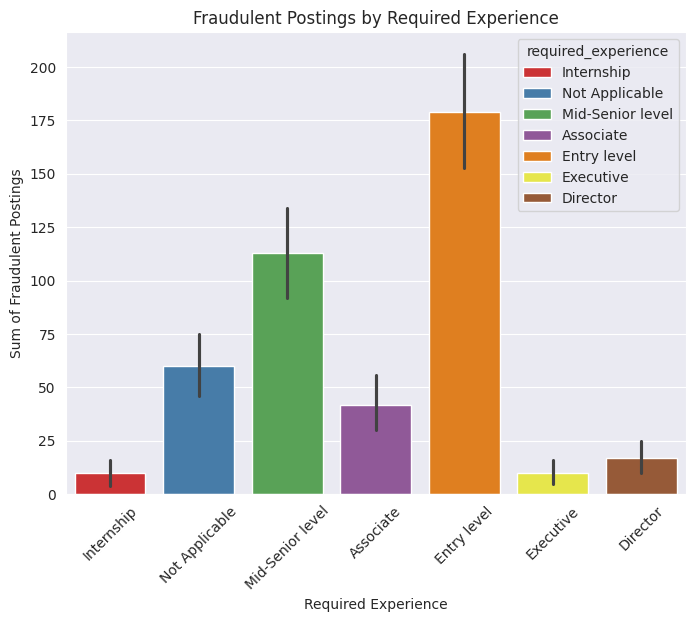

In [25]:
# Bar plot for required_experience
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='required_experience', y='fraudulent', estimator=sum, hue='required_experience', dodge=False, palette='Set1')
plt.title('Fraudulent Postings by Required Experience')
plt.xlabel('Required Experience')
plt.ylabel('Sum of Fraudulent Postings')
plt.xticks(rotation=45)
plt.show()

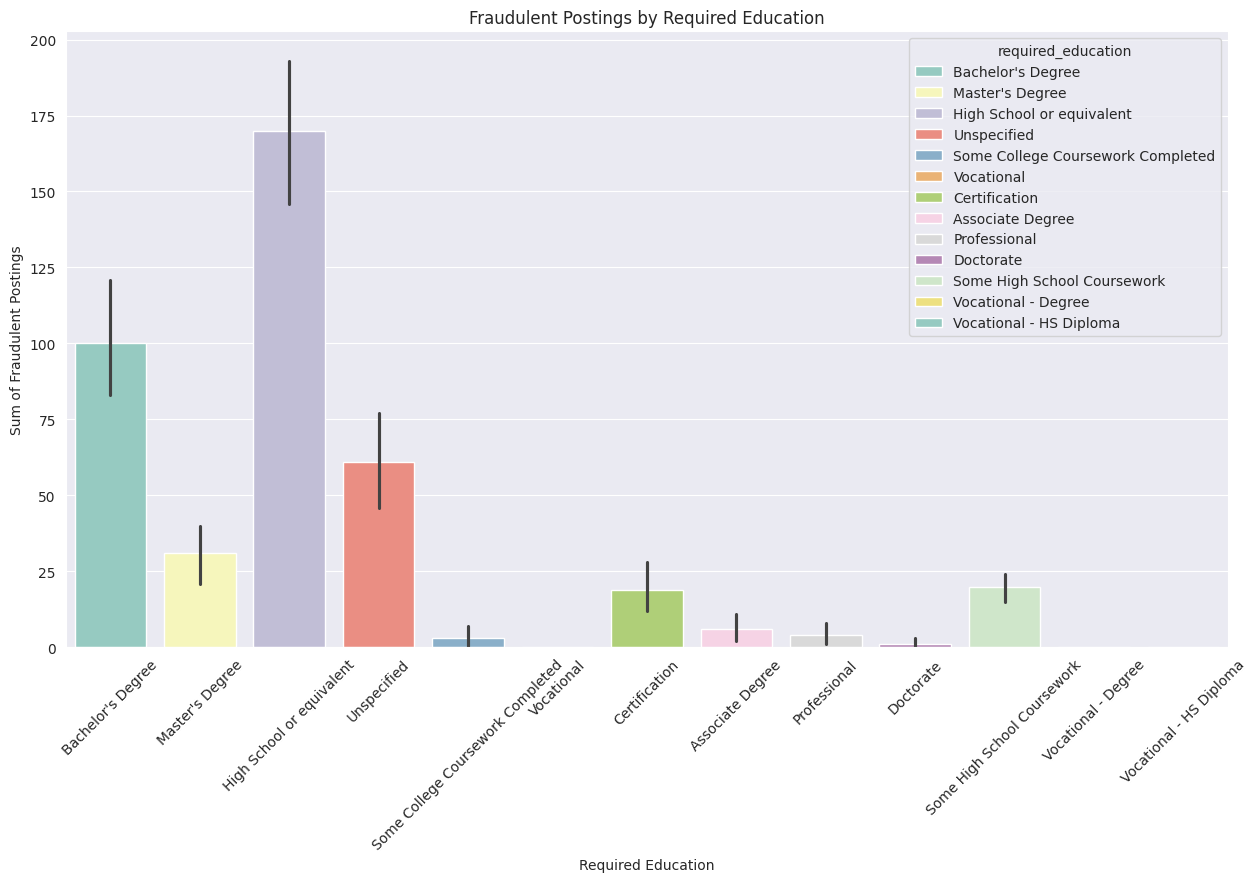

In [26]:
# Bar plot for required_education
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x='required_education', y='fraudulent', estimator=sum, hue='required_education', dodge=False, palette='Set3')
plt.title('Fraudulent Postings by Required Education')
plt.xlabel('Required Education')
plt.ylabel('Sum of Fraudulent Postings')
plt.xticks(rotation=45)
plt.show()

### c. Data Preprocessing

In [3]:
# Select features
df_selected = select_features(df)

# Prepare initial features
df_processed = prepare_initial_features(df_selected)

# Create feature stores
structured_features, label_encoders = create_structured_features(df_processed)
text_features = create_text_features(df_processed)

/mnt/c/Users/yzy_s/PycharmProjects/mlops-final-project/utli.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col_name] = indicator
/mnt/c/Users/yzy_s/PycharmProjects/mlops-final-project/utli.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, col_name] = indicator


Processing title...
Processing description...
Lemmatization error: local variable 'x' referenced before assignment
Lemmatization error: local variable 'self' referenced before assignment
Lemmatization error: local variable 'x' referenced before assignment
Lemmatization error: string indices must be integers
Lemmatization error: local variable 'self' referenced before assignment
Lemmatization error: local variable 'self' referenced before assignment
Lemmatization error: local variable 'self' referenced before assignment
Lemmatization error: local variable 'x' referenced before assignment
Lemmatization error: local variable 'self' referenced before assignment
Lemmatization error: local variable 'x' referenced before assignment
Lemmatization error: too many values to unpack (expected 0)
Processing requirements...
Processing company_profile...
Processing benefits...
Label encoding location...
Label encoding employment_type...
Label encoding required_experience...
Label encoding required_ed

In [4]:
print_feature_summary(structured_features, text_features)


Feature Stores Summary:
Structured Features Shape: (17880, 31)
Number of structured features: 31

Structured features include:
- Label encoded categorical features: 6
- Binary features: 4
- Frequency encoded features: 6
- Text length features: 5

Text Features Shape: (17880, 5)
Text features include: ['title_cleaned', 'description_cleaned', 'requirements_cleaned', 'company_profile_cleaned', 'benefits_cleaned']


In [5]:
# Subset target variable
target_features = df[['fraudulent']]

In [6]:
# Add PK column 
for df in [structured_features, text_features, target_features]:
        if 'job_id' in df.columns:
            df.drop(columns=['job_id'], inplace=True)
    
    # Add incremental job_id as the first column
structured_features.insert(0, 'job_id', range(1, len(structured_features) + 1))
text_features.insert(0, 'job_id', range(1, len(text_features) + 1))
target_features.insert(0, 'job_id', range(1, len(target_features) + 1))

In [7]:
# Add an event_timestamp column with today's timestamp
structured_features['event_timestamp'] = pd.Timestamp.now()
text_features['event_timestamp'] = pd.Timestamp.now()
target_features['event_timestamp'] = pd.Timestamp.now()

In [12]:
columns_to_convert = [
    "title_cleaned",
    "description_cleaned",
    "requirements_cleaned",
    "company_profile_cleaned",
    "benefits_cleaned"
]

text_features[columns_to_convert] = text_features[columns_to_convert].astype("string")

In [7]:
text_features.head()

,job_id,title_cleaned,description_cleaned,requirements_cleaned,company_profile_cleaned,benefits_cleaned,event_timestamp
0,1,marketing intern,food52 fast growing james beard award winning ...,experience content management system major plu...,food52 created groundbreaking award winning co...,,2024-11-19 15:33:35.495589
1,2,customer service cloud video production,organised focused vibrant awesome passion cust...,expect key responsibility communicate client 9...,90 second world cloud video production service...,get usthrough part 90 second team gain experie...,2024-11-19 15:33:35.495589
2,3,commissioning machinery assistant cma,client located houston actively seeking experi...,implement pre commissioning commissioning proc...,valor service provides workforce solution meet...,,2024-11-19 15:33:35.495589
3,4,account executive washington dc,company esri environmental system research ins...,education bachelor master gi business administ...,passion improving quality life geography heart...,culture anything corporate collaborative creat...,2024-11-19 15:33:35.495589
4,5,bill review manager,job title itemization review managerlocation f...,qualification right license state texasdiploma...,spotsource solution llc global human capital m...,full benefit offered,2024-11-19 15:33:35.495589


In [8]:
structured_features.head()

,job_id,location,employment_type,required_experience,required_education,industry,function,telecommuting,has_company_logo,has_questions,...,required_experience_is_missing,required_education_is_missing,industry_is_missing,function_is_missing,title_length,description_length,requirements_length,company_profile_length,benefits_length,event_timestamp
0,1,2535,3,4,6,123,22,0,1,0,...,0,1,1,0,16,697,665,629,0,2024-11-19 15:33:35.494551
1,2,1073,1,6,6,75,7,0,1,0,...,0,1,0,0,39,1585,1104,1064,808,2024-11-19 15:33:35.494551
2,3,1867,2,7,6,123,36,0,1,0,...,1,1,1,1,37,269,1086,589,0,2024-11-19 15:33:35.494551
3,4,1703,1,5,1,22,31,0,1,0,...,0,0,0,0,31,2045,1191,464,675,2024-11-19 15:33:35.494551
4,5,1741,1,5,1,51,16,0,1,1,...,0,0,0,0,19,1195,651,1369,20,2024-11-19 15:33:35.494551


In [9]:
target_features.head()

,job_id,fraudulent,event_timestamp
0,1,0,2024-11-19 15:33:35.496177
1,2,0,2024-11-19 15:33:35.496177
2,3,0,2024-11-19 15:33:35.496177
3,4,0,2024-11-19 15:33:35.496177
4,5,0,2024-11-19 15:33:35.496177


## 3. Feature Stores

### A. Structured Feature Store

The structured feature store contains processed numerical and categorical features. These features are ready for use in traditional machine learning models.

#### **(1) Label Encoded Categorical Features**
These categorical features have been converted to numerical values using label encoding:
- `location`: Job locations (e.g., "US, NY" → 1, "UK, London" → 2)
- `employment_type`: Job types (e.g., "Full-time" → 0, "Part-time" → 1)
- `required_experience`: Experience levels (e.g., "Entry Level" → 0, "Senior" → 1)
- `required_education`: Education requirements (e.g., "Bachelor's" → 0, "Master's" → 1)
- `industry`: Company industries (e.g., "Technology" → 0, "Healthcare" → 1)
- `function`: Job functions (e.g., "Engineering" → 0, "Sales" → 1)

#### **(2) Binary Features**
Simple 0/1 indicators:
- `telecommuting`: Remote work indicator (1=yes, 0=no)
- `has_company_logo`: Company logo presence (1=yes, 0=no)
- `has_questions`: Screening questions presence (1=yes, 0=no)
- `no_logo_no_questions`: Combined feature (1=no logo & no questions, 0=otherwise)

### **(3) Frequency Encoded Features**
Represents how common each category is in the dataset:
- `location_freq`: Location frequency (e.g., 0.25 = appears in 25% of postings)
- `employment_type_freq`: Employment type frequency
- `required_experience_freq`: Experience level frequency
- `required_education_freq`: Education requirement frequency
- `industry_freq`: Industry frequency
- `function_freq`: Job function frequency

### **(4) Text Length Features**
Character counts of cleaned text fields:
- `title_length`: Job title length
- `description_length`: Job description length
- `requirements_length`: Requirements text length
- `company_profile_length`: Company profile length
- `benefits_length`: Benefits text length

### **(5) Missing Value Indicators**
Binary flags (0/1) indicating missing values in original data:
- Various columns ending with `_is_missing`

## B. Text Feature Store

The text feature store contains cleaned and processed text data, ready for natural language processing tasks.

### **(1) Cleaned Text Features**
Each text field has been processed to remove noise and standardize format:

- `title_cleaned`
  - Original: "Senior Software Engineer (Python/Django)"
  - Cleaned: "senior software engineer python django"

- `description_cleaned`
  - Original: "We are looking for a talented Software Engineer..."
  - Cleaned: "looking talented software engineer..."

- `requirements_cleaned`
  - Original: "5+ years of Python experience required"
  - Cleaned: "years python experience required"

- `company_profile_cleaned`
  - Original: "We're a fast-growing tech company..."
  - Cleaned: "fast growing tech company"

- `benefits_cleaned`
  - Original: "401(k), Health Insurance, Flexible Hours"
  - Cleaned: "health insurance flexible hours"

## C. Target Feature Store

The target feature store only contains target variable 'fraudulent'

### a. Initialize the Feast repo called job repo to current directory & Save data to directory

In [14]:
!feast init -m job_repo


Creating a new Feast repository in /mnt/c/Users/yzy_s/PycharmProjects/mlops-final-project/job_repo.



In [14]:
# Save features
save_features(structured_features, text_features, target_features)

### b. Define feature stores and schema for job_repo

In [10]:
# Update feature_store.yaml
feature_store_yaml_content = """
project: job_project
registry: data/registry.db
provider: local
online_store:
    type: sqlite
    path: data/online_store.db
offline_store:
    type: file
entity_key_serialization_version: 2
"""

# Write the content to feature_store.yaml
with open('job_repo/feature_repo/feature_store.yaml', 'w') as f:
    f.write(feature_store_yaml_content.strip())

print("Updated feature_store.yaml")

Updated feature_store.yaml


### c. Create features.py

In [20]:
# Create features.py file
features_py_content = '''
from datetime import timedelta
from feast import Entity, FeatureView, Field, FileSource, Project
from feast.types import Float32, String, Int64

# Define a project for the feature repo
project = Project(name="job_project", description="A project for job data")

# Define the entity
job = Entity(
    name="job_id",
    join_keys=["job_id"],
    description="Unique identifier for job",
)

# Define the Structured Feature data source
job_structured_data_source = FileSource(
    name='job_structured_data',
    path="data/structured_features.parquet",
    timestamp_field="event_timestamp")

# Define the Structured Feature
job_structured_features = FeatureView(
    name="job_structured_features_view",
    entities=[job],
    ttl=timedelta(days=1),
    schema=[
        Field(name="location", dtype=Int64),
        Field(name="employment_type", dtype=Int64),
        Field(name="required_experience", dtype=Int64),
        Field(name="required_education", dtype=Int64),
        Field(name="industry", dtype=Int64),
        Field(name="function", dtype=Int64),
        Field(name="telecommuting", dtype=Int64),
        Field(name="has_company_logo", dtype=Int64),
        Field(name="has_questions", dtype=Int64),
        Field(name="no_logo_no_questions", dtype=Int64),
        Field(name="location_freq", dtype=Float32),
        Field(name="employment_type_freq", dtype=Float32),
        Field(name="required_experience_freq", dtype=Float32),
        Field(name="required_education_freq", dtype=Float32),
        Field(name="industry_freq", dtype=Float32),
        Field(name="function_freq", dtype=Float32),
        Field(name="description_is_missing", dtype=Int64),
        Field(name="requirements_is_missing", dtype=Int64),
        Field(name="company_profile_is_missing", dtype=Int64),
        Field(name="benefits_is_missing", dtype=Int64),
        Field(name="location_is_missing", dtype=Int64),
        Field(name="employment_type_is_missing", dtype=Int64),
        Field(name="required_experience_is_missing", dtype=Int64),
        Field(name="required_education_is_missing", dtype=Int64),
        Field(name="industry_is_missing", dtype=Int64),
        Field(name="function_is_missing", dtype=Int64),
        Field(name="title_length", dtype=Int64),
        Field(name="description_length", dtype=Int64),
        Field(name="requirements_length", dtype=Int64),
        Field(name="company_profile_length", dtype=Int64),
        Field(name="benefits_length", dtype=Int64),
    ],
    online=True,
    source=job_structured_data_source,
)

# Define the Text Features data source
job_text_data_source  = FileSource(
    name='job_text_data',
    path="data/text_features.parquet",
    timestamp_field="event_timestamp" )

# Define the predictor Feature View
job_text_features = FeatureView(
    name="job_text_features_view",
    entities=[job],  # Replace 'job' with the correct entity key for your use case
    ttl=timedelta(days=1),
    schema=[
        Field(name="job_id", dtype=Int64),
        Field(name="title_cleaned", dtype=String),
        Field(name="description_cleaned", dtype=String),
        Field(name="requirements_cleaned", dtype=String),
        Field(name="company_profile_cleaned", dtype=String),
        Field(name="benefits_cleaned", dtype=String)
    ],
    online=True,
    source=job_text_data_source,
)

# Define the target data source
job_target_source = FileSource(
    name='job_target',
    path="data/target_features.parquet",
    timestamp_field="event_timestamp")

# Define the target Feature View with all columns
job_target_features = FeatureView(
    name="job_target_feature_view",
    entities=[job],
    ttl=timedelta(days=1),
    schema=[
        Field(name="fraudulent", dtype=Int64),
    ],
    online=True,
    source=job_target_source,
)
'''

# Write the content to features.py
with open('job_repo/feature_repo/features.py', 'w') as f:
    f.write(features_py_content.strip())

print("Created features.py")

Created features.py


### c. feast apply

In [21]:
!cd job_repo/feature_repo && feast apply

Applying changes for project job_project
11/19/2024 04:10:27 PM root WARNING: Cannot use sqlite_vec for vector search
11/19/2024 04:10:27 PM root WARNING: Cannot use sqlite_vec for vector search
11/19/2024 04:10:27 PM root WARNING: Cannot use sqlite_vec for vector search
11/19/2024 04:10:27 PM root WARNING: Cannot use sqlite_vec for vector search
11/19/2024 04:10:27 PM root WARNING: Cannot use sqlite_vec for vector search
11/19/2024 04:10:27 PM root WARNING: Cannot use sqlite_vec for vector search
Created project job_project
Created entity job_id
Created feature view job_structured_features_view
Created feature view job_target_feature_view
Created feature view job_text_features_view

11/19/2024 04:10:27 PM root WARNING: Cannot use sqlite_vec for vector search
11/19/2024 04:10:27 PM root WARNING: Cannot use sqlite_vec for vector search
11/19/2024 04:10:27 PM root WARNING: Cannot use sqlite_vec for vector search
11/19/2024 04:10:27 PM root WARNING: Cannot use sqlite_vec for vector search